<a href="https://colab.research.google.com/github/svvuae/Python_Study/blob/main/EE965_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
#!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
!pip install umap
!pip install umap-learn
import umap.umap_ as umap
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install gdown
import gdown

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=141d585fe3311426c52071546beb3bd77a7a609c3976be5bcb18852e93e4da0b
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
# Download dataset from google drive
folder_id = '1fN6i2SVxBNaMNjOKu6d_MgPW3OmZMM0Y'
url = f'https://drive.google.com/uc?id=1T1PjJONoH54VXqHykMxmvwnC2KmkjauZ'
gdown.download(url, output="data.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1T1PjJONoH54VXqHykMxmvwnC2KmkjauZ
To: /content/data.csv
100%|██████████| 104M/104M [00:00<00:00, 144MB/s] 


'data.csv'

In [ ]:
# Load data
data = pd.read_csv("data.csv")
df = pd.read_csv("data.csv", index_col=0)
df = df.drop_duplicates()
scaler = StandardScaler()
features = scaler.fit_transform(df)

In [ ]:
# number of clusters
num_clusters = 12

In [ ]:
# 1. K-Means Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data['kmeans_labels'] = kmeans.fit_predict(features)

In [ ]:
# 2. Spectral Clustering
spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.01, random_state=0)
data['spectral_labels'] = spectral.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# 3. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
data['agglo_labels'] = agglo.fit_predict(features)

In [ ]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=10)
features_pca = pca.fit_transform(features)
pca_df = pd.DataFrame(features_pca, columns=[f'PC{i+1}' for i in range(10)])

In [ ]:
# Clustering on Reduced Data (PCA-transformed)
# 1. K-Means on PCA data
pca_kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data['pca_kmeans_labels'] = pca_kmeans.fit_predict(features_pca)

In [ ]:
# 2. Spectral Clustering on PCA data
pca_spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.01, random_state=0)
data['pca_spectral_labels'] = pca_spectral.fit_predict(features_pca)

In [ ]:
# 3. Agglomerative Clustering on PCA data
pca_agglo = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
data['pca_agglo_labels'] = pca_agglo.fit_predict(features_pca)

In [ ]:
# UMAP Visualization
umap_reducer = umap.UMAP(n_neighbors=10, random_state=0)
umap_embeddings = umap_reducer.fit_transform(features)
umap_pca_embeddings = umap_reducer.fit_transform(features_pca)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
# Function to plot UMAP embeddings
def plot_clusters(embeddings, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], hue=labels, palette="viridis", s=10)
    plt.title(title)
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.show()

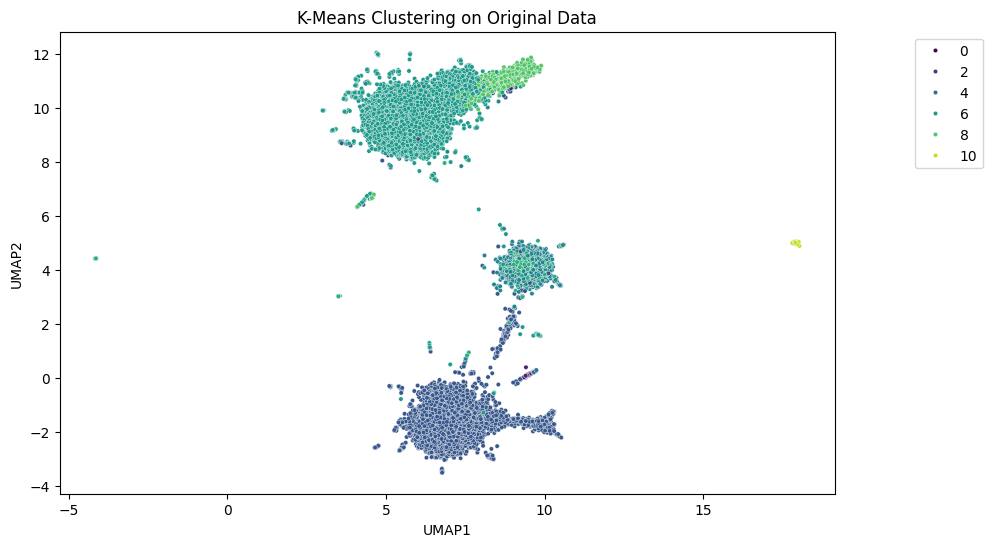

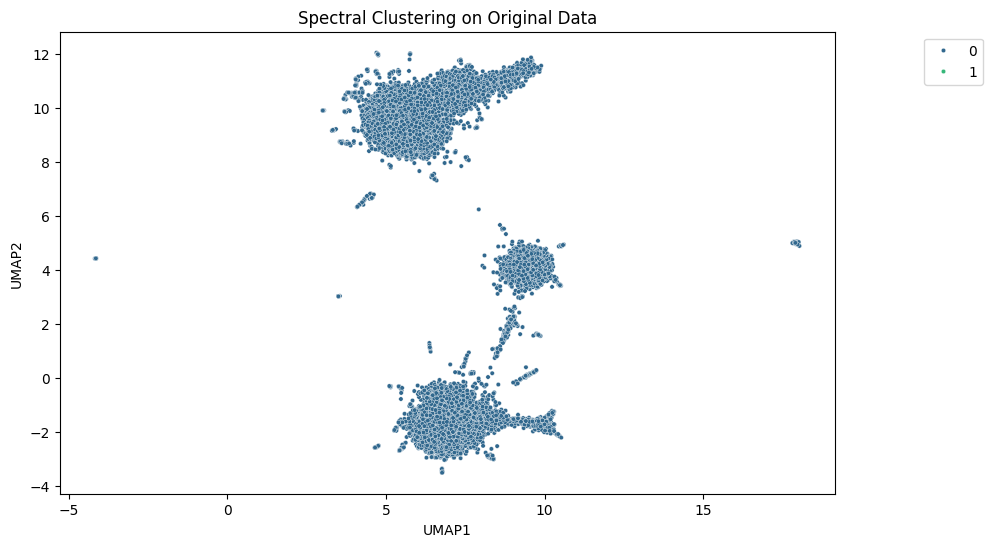

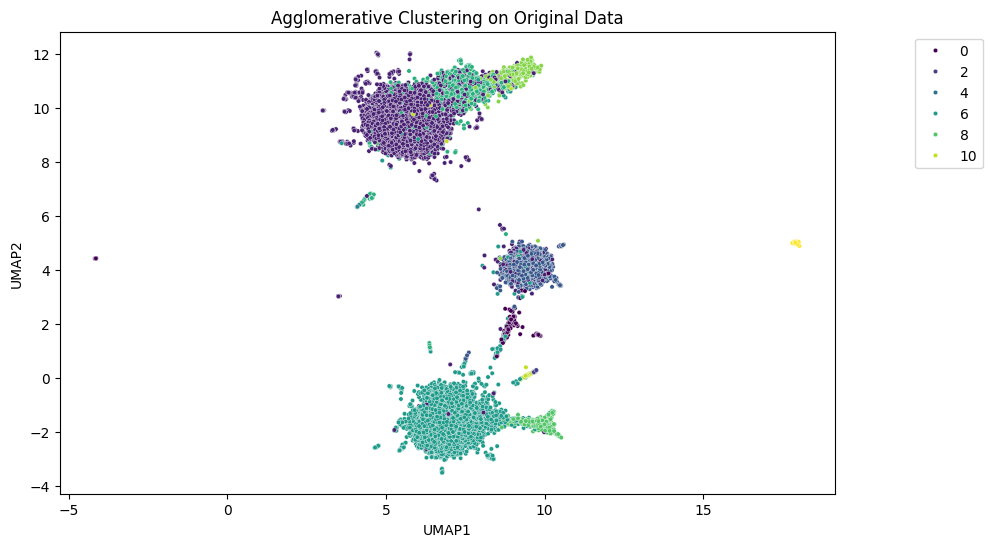

In [ ]:
# Plot original data clusters
plot_clusters(umap_embeddings, data['kmeans_labels'], "K-Means Clustering on Original Data")
plot_clusters(umap_embeddings, data['spectral_labels'], "Spectral Clustering on Original Data")
plot_clusters(umap_embeddings, data['agglo_labels'], "Agglomerative Clustering on Original Data")

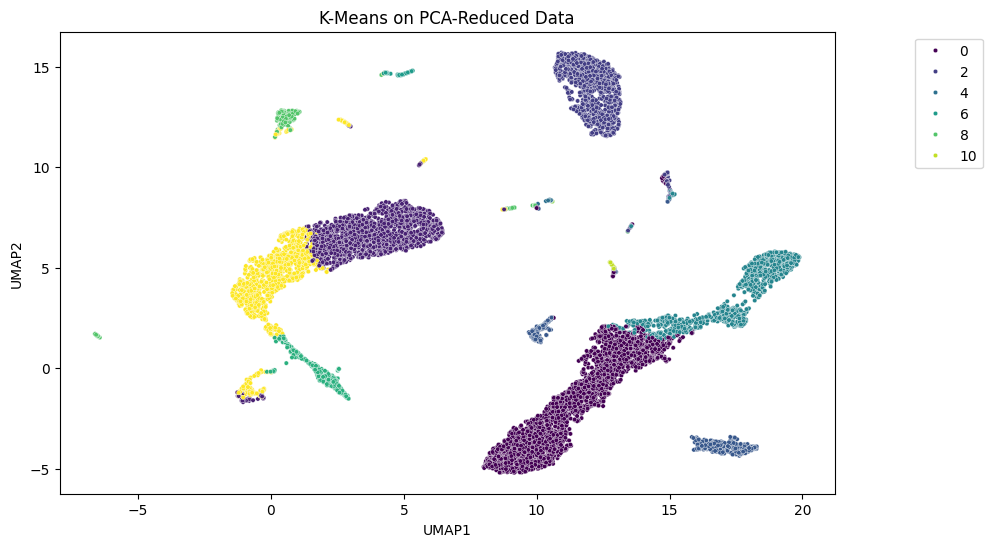

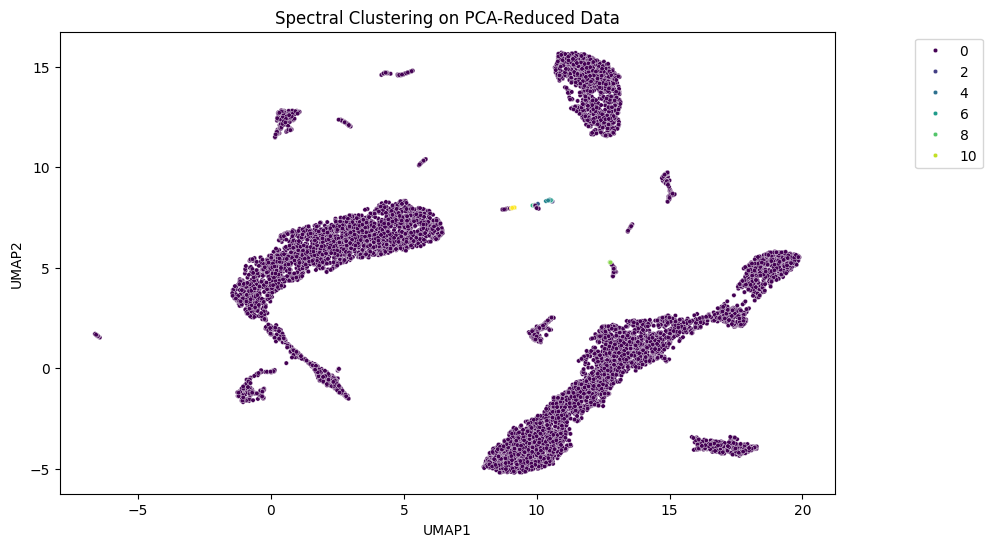

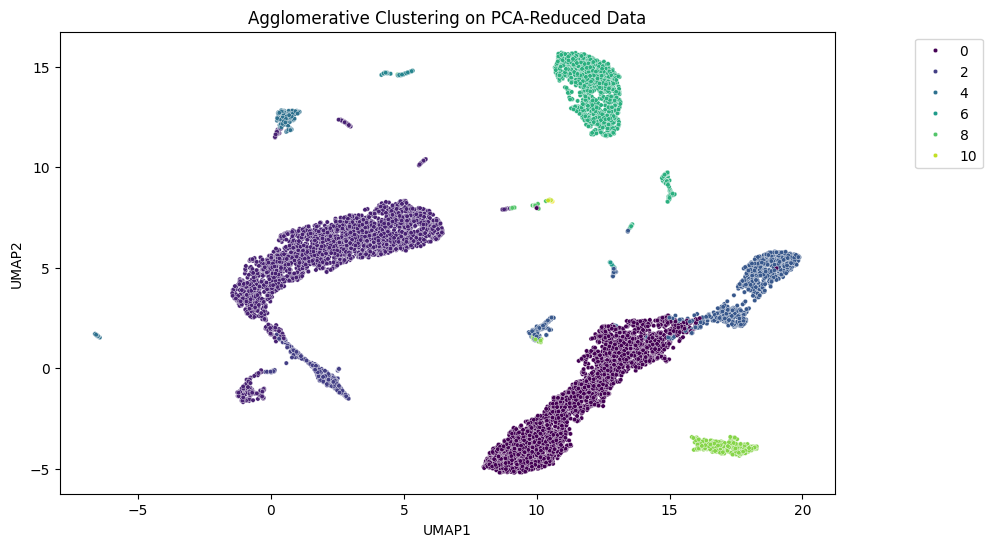

In [ ]:
# Plot PCA-reduced data clusters
plot_clusters(umap_pca_embeddings, data['pca_kmeans_labels'], "K-Means on PCA-Reduced Data")
plot_clusters(umap_pca_embeddings, data['pca_spectral_labels'], "Spectral Clustering on PCA-Reduced Data")
plot_clusters(umap_pca_embeddings, data['pca_agglo_labels'], "Agglomerative Clustering on PCA-Reduced Data")

In [ ]:
# Calculate and compare silhouette scores for each clustering method
def calculate_silhouette_score(data, labels):
    return silhouette_score(data, labels)

In [ ]:
# Silhouette scores for original data clustering
print("Silhouette Score (Original Data - KMeans):", calculate_silhouette_score(features, data['kmeans_labels']))
print("Silhouette Score (Original Data - Spectral):", calculate_silhouette_score(features, data['spectral_labels']))
print("Silhouette Score (Original Data - Agglomerative):", calculate_silhouette_score(features, data['agglo_labels']))

Silhouette Score (Original Data - KMeans): 0.07750277574268442
Silhouette Score (Original Data - Spectral): 0.7901048318543916
Silhouette Score (Original Data - Agglomerative): 0.0025846750281451596


In [ ]:
# Silhouette scores for PCA-reduced data clustering
print("Silhouette Score (PCA Data - KMeans):", calculate_silhouette_score(features_pca, data['pca_kmeans_labels']))
print("Silhouette Score (PCA Data - Spectral):", calculate_silhouette_score(features_pca, data['pca_spectral_labels']))
print("Silhouette Score (PCA Data - Agglomerative):", calculate_silhouette_score(features_pca, data['pca_agglo_labels']))

Silhouette Score (PCA Data - KMeans): 0.48090048782067374
Silhouette Score (PCA Data - Spectral): 0.5327734803492311
Silhouette Score (PCA Data - Agglomerative): 0.5721054249624169
